# ESD for Pytorch pretrained models
http://pytorch.org/docs/master/torchvision/models.html

Note: We don't normalize by 1/N for the pytorch models.

### FC / Linear Layers 226 and 302

In [12]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn

import numpy as np

import sklearn
from scipy.linalg import svd
import import_ipynb

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import powerlaw

import RMT_Util

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5,5]
matplotlib.rcParams.update({'font.size': 16})
plt.tight_layout()

<Figure size 360x360 with 0 Axes>

In [14]:
pretrained_model = models.inception_v3(pretrained=True)

### MP fits for 0 spikes

226 Linear(in_features=768, out_features=1000, bias=True)


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


% spikes outside bulk 0.00
% sigma 2.4376
(1000, 768) 1.3020833333333333 2.4375627179430803
hard rank  (1000, 768)   768  NR rank 768


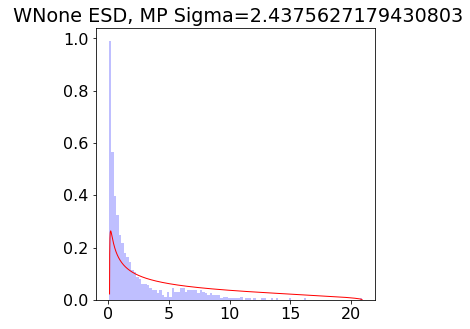

302 Linear(in_features=2048, out_features=1000, bias=True)
% spikes outside bulk 0.00
% sigma 3.2088
(1000, 2048) 2.048 3.208765324503657
hard rank  (1000, 2048)   1000  NR rank 1000


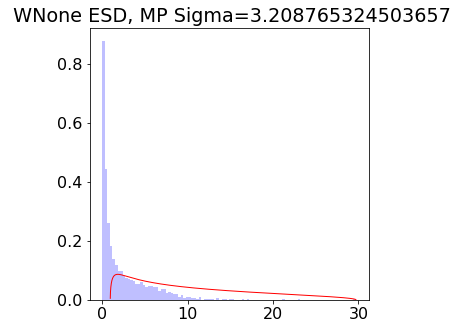

In [15]:
for im, m in enumerate(pretrained_model.modules()):
    if isinstance(m, nn.Linear):
        print(im, m)
        W = np.array(m.weight.data.clone().cpu())
        Q = RMT_Util.get_Q(W)
        u, sv, vh = svd(W) 
        evals = sv*sv

        sigma = RMT_Util.plot_ESD_and_fit(model=None,eigenvalues=evals, weightfile=None, layer=None, 
                            Q=Q, num_spikes=0, sigma=None, color='blue')
        
        tol = np.max(sv)*np.finfo(np.float32).eps/(2.0*np.sqrt(np.sum(W.shape)+1))
        print(W.shape, Q, sigma)
        print("hard rank ",W.shape," ",np.linalg.matrix_rank(W, tol = tol)," NR rank",np.linalg.matrix_rank(W, tol = tol))
        plt.show()
        
        

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


% spikes outside bulk 18.15
% sigma 1.1992
(1000, 768) 1.3020833333333333 1.1992362957249592
hard rank  (1000, 768)   768  NR rank 768


Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


power law fits  5.257344309925126


Assuming nested distributions


(0.4230780644827974, 0.5416872127147054)
(0.7000450611832895, 0.48389916382652665)
(0.5608695507644348, 0.5748864689046953)
(0.6027779841700667, 0.5466563946134602)


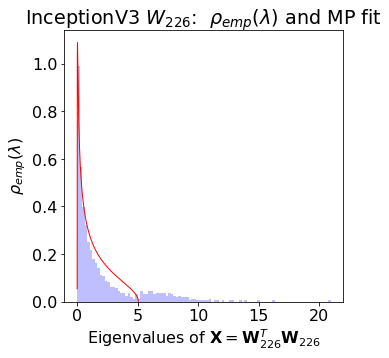

In [16]:
for im, m in enumerate(pretrained_model.modules()):
    if im==226:
        W = np.array(m.weight.data.clone().cpu())
        Q = RMT_Util.get_Q(W)
        u, sv, vh = svd(W) 
        evals = sv*sv
        num_spikes = 118

        sigma = RMT_Util.plot_ESD_and_fit(model=None,eigenvalues=evals, weightfile=None, layer=None, 
                            Q=Q, num_spikes=num_spikes, sigma=None, color='blue')
        
        tol = np.max(sv)*np.finfo(np.float32).eps/(2.0*np.sqrt(np.sum(W.shape)+1))
        print(W.shape, Q, sigma)
        print("hard rank ",W.shape," ",np.linalg.matrix_rank(W, tol = tol)," NR rank",np.linalg.matrix_rank(W, tol = tol))
        plt.title(r"InceptionV3 $W_{226}$:  $\rho_{emp}(\lambda)$ and MP fit")
        plt.xlabel("Eigenvalues of $\mathbf{X}=\mathbf{W}^{T}_{226}\mathbf{W}_{226}$")
        plt.ylabel(r"$\rho_{emp}(\lambda)$")
        
        
        fit = powerlaw.Fit(evals, xmax=np.max(evals))
        print("power law fits ",fit.alpha)
        print(fit.distribution_compare('truncated_power_law', 'power_law', normalized_ratio=True))
        print(fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio=True))

        print(fit.distribution_compare('truncated_power_law', 'exponential', normalized_ratio=True))
        print(fit.loglikelihood_ratio('truncated_power_law', 'stretched_exponential', normalized_ratio=True))

### Layer 302 num spikes = 15 + sigma $(\sigma^{2})$ autofit using KDE

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


% spikes outside bulk 1.99
% sigma 1.7038
(1000, 768) 1.3020833333333333 1.7038478818486922
hard rank  (1000, 768)   768  NR rank 768


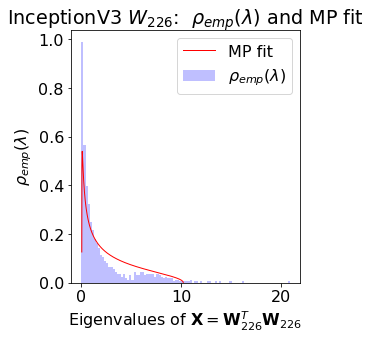

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


power law fits  5.257344309925126


Assuming nested distributions


(0.4230780644827974, 0.5416872127147054)
(0.7000450611832895, 0.48389916382652665)
(0.5608695507644348, 0.5748864689046953)
(0.6027779841700667, 0.5466563946134602)


RMT_Util.ipynb:6: RuntimeWarning: divide by zero encountered in true_divide
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in sqrt
  "source": [


% spikes outside bulk 0.00
% sigma 1.1332


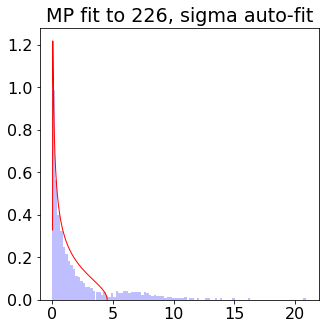

In [17]:
for im, m in enumerate(pretrained_model.modules()):
    if im==226:
        W = np.array(m.weight.data.clone().cpu())
        Q = RMT_Util.get_Q(W)
        u, sv, vh = svd(W) 
        evals = sv*sv
        num_spikes = 15

        sigma = RMT_Util.plot_ESD_and_fit(model=None,eigenvalues=evals, weightfile=None, layer=None, 
                            Q=Q, num_spikes=num_spikes, sigma=None, color='blue')
        
        tol = np.max(sv)*np.finfo(np.float32).eps/(2.0*np.sqrt(np.sum(W.shape)+1))
        print(W.shape, Q, sigma)
        print("hard rank ",W.shape," ",np.linalg.matrix_rank(W, tol = tol)," NR rank",np.linalg.matrix_rank(W, tol = tol))
        plt.title(r"InceptionV3 $W_{226}$:  $\rho_{emp}(\lambda)$ and MP fit")
        plt.xlabel("Eigenvalues of $\mathbf{X}=\mathbf{W}^{T}_{226}\mathbf{W}_{226}$")
        plt.ylabel(r"$\rho_{emp}(\lambda)$")
        plt.legend()
        plt.tight_layout()
        plt.savefig("img/inception-l1.png")
        plt.show()
        
        fit = powerlaw.Fit(evals, xmax=np.max(evals))
        print("power law fits ",fit.alpha)
        print(fit.distribution_compare('truncated_power_law', 'power_law', normalized_ratio=True))
        print(fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio=True))
        print(fit.distribution_compare('truncated_power_law', 'exponential', normalized_ratio=True))
        print(fit.loglikelihood_ratio('truncated_power_law', 'stretched_exponential', normalized_ratio=True))
        
        s1 = RMT_Util.fit_mp(evals, Q)
        RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q,  sigma=s1)
        plt.title("MP fit to 226, sigma auto-fit")

### Layer 302 num spikes = 100 + sigma $(\sigma^{2})$ autofit using KDE

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


% spikes outside bulk 11.11
% sigma 1.5180
(1000, 2048) 2.048 1.5180452678487213
hard rank  (1000, 2048)   1000  NR rank 1000


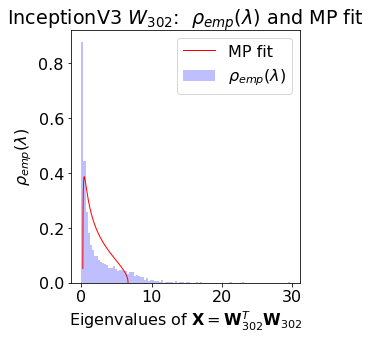

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


power law fits  4.484108911246553


Assuming nested distributions


(0.2530478473480079, 0.7384785728783724)
(0.6023798873683964, 0.5469212948137095)
(1.080967976220703, 0.27971135889294463)
(0.3008544486436183, 0.7635254866243915)


RMT_Util.ipynb:6: RuntimeWarning: divide by zero encountered in true_divide
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in sqrt
  "source": [


% spikes outside bulk 0.00
% sigma 1.0237


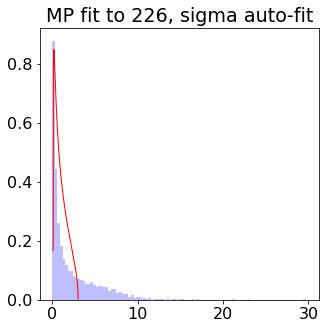

In [18]:
for im, m in enumerate(pretrained_model.modules()):
    if im==302:
        W = np.array(m.weight.data.clone().cpu())
        Q = RMT_Util.get_Q(W)
        u, sv, vh = svd(W) 
        evals = sv*sv
        num_spikes = 100

        sigma = RMT_Util.plot_ESD_and_fit(model=None,eigenvalues=evals, weightfile=None, layer=None, 
                            Q=Q, num_spikes=num_spikes, sigma=None, color='blue')
        
        tol = np.max(sv)*np.finfo(np.float32).eps/(2.0*np.sqrt(np.sum(W.shape)+1))
        print(W.shape, Q, sigma)
        print("hard rank ",W.shape," ",np.linalg.matrix_rank(W, tol = tol)," NR rank",np.linalg.matrix_rank(W, tol = tol))
        plt.title(r"InceptionV3 $W_{302}$:  $\rho_{emp}(\lambda)$ and MP fit")
        plt.xlabel("Eigenvalues of $\mathbf{X}=\mathbf{W}^{T}_{302}\mathbf{W}_{302}$")
        plt.ylabel(r"$\rho_{emp}(\lambda)$")
        plt.legend()
        plt.tight_layout()
        plt.savefig("img/inception-l2.png")
        plt.show()
        
        fit = powerlaw.Fit(evals, xmax=np.max(evals))
        print("power law fits ",fit.alpha)
        print(fit.distribution_compare('truncated_power_law', 'power_law', normalized_ratio=True))
        print(fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio=True))

        print(fit.distribution_compare('truncated_power_law', 'exponential', normalized_ratio=True))
        print(fit.loglikelihood_ratio('truncated_power_law', 'stretched_exponential', normalized_ratio=True))
        
        s1 = RMT_Util.fit_mp(evals, Q)
        RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q,  sigma=s1)
        plt.title("MP fit to 226, sigma auto-fit")

### Analysis of Power Law Behavior

No handles with labels found to put in legend.


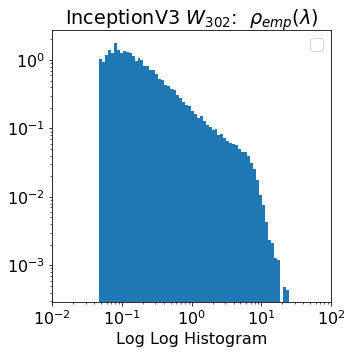

In [19]:
bins = np.logspace(np.log10(np.min(evals)), np.log10(np.max(evals)), num=100)
plt.hist(evals, bins=bins, density=True, log=True);
plt.xscale('log')
plt.title(r"InceptionV3 $W_{302}$:  $\rho_{emp}(\lambda)$")#+"\n"+r"Log Log Histogram")
plt.xlim(0.01,100)
plt.xlabel("Log Log Histogram")
plt.legend()

In [20]:
fit = powerlaw.Fit(evals, xmax=np.max(evals))
print("power law fits ",fit.alpha)
print(fit.distribution_compare('truncated_power_law', 'power_law', normalized_ratio=True))
print(fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio=True))

print(fit.distribution_compare('truncated_power_law', 'exponential', normalized_ratio=True))
print(fit.loglikelihood_ratio('truncated_power_law', 'stretched_exponential', normalized_ratio=True))

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


power law fits  4.484108911246553


Assuming nested distributions


(0.2530478473480079, 0.7384785728783724)
(0.6023798873683964, 0.5469212948137095)
(1.080967976220703, 0.27971135889294463)
(0.3008544486436183, 0.7635254866243915)


Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


4.484108911246553

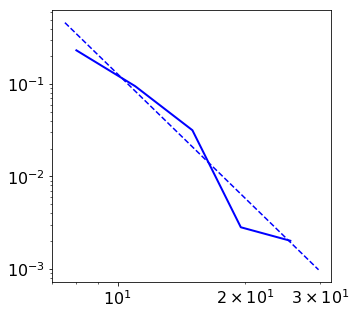

In [21]:
xmax = np.max(evals)
fit = powerlaw.Fit(evals, xmax=xmax)
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
fit.alpha

In [22]:
fit.supported_distributions

{'exponential': powerlaw.Exponential,
 'lognormal': powerlaw.Lognormal,
 'lognormal_positive': powerlaw.Lognormal_Positive,
 'power_law': powerlaw.Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law}

### Automated Fits